In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline

from pandas_profiling import ProfileReport

In [28]:
df = pd.read_csv('wholesale_customers_data.csv')

profile = ProfileReport(df)

profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]


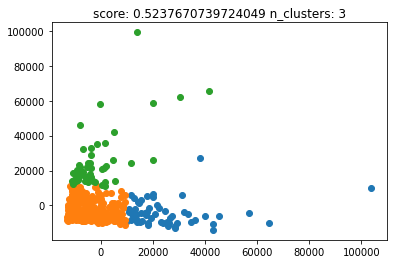

In [84]:
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from random import choice

data = df.values

#data = np.log(data)

pca = PCA(n_components=2)

n_clusters = choice(list(range(2,10)))

data = pca.fit_transform(data)

scaler = StandardScaler()
model = KMeans(n_clusters=n_clusters)

pipe = make_pipeline(scaler, model)

result = pipe.fit_predict(data)

clusters = np.unique(result)


from sklearn.metrics import silhouette_score

labels = pipe[-1].labels_

score = silhouette_score(data, labels)

for cluster in clusters:
    ix = np.where(result == cluster)
    pyplot.scatter(data[ix, 0], data[ix, 1])

pyplot.title(f'score: {score} n_clusters: {n_clusters}')
pyplot.show()

In [39]:
data = data[:, 2:]

In [40]:
data

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])